In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.ion() # 動態更新開關

In [3]:
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o')
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        ...

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    #Example
    def __call__(self):
        import numpy as np
        import time
        self.on_launch()
        xdata = []
        ydata = []
        for x in np.arange(0,10,0.5):
            xdata.append(x)
            ydata.append(np.exp(-x**2)+10*np.exp(-(x-7)**2))
            self.on_running(xdata, ydata)
            time.sleep(1)
        return xdata, ydata



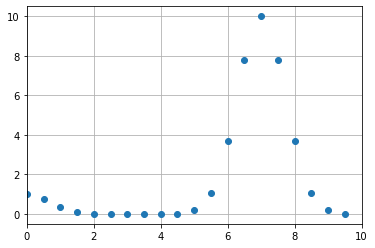

In [5]:
d = DynamicUpdate()
d()
plt.ioff()